<a href="https://www.kaggle.com/code/sonawanelalitsunil/thyroid-cancer-eda-xgb-83?scriptVersionId=220900694" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thyroid-cancer-risk-prediction-dataset/thyroid_cancer_risk_data.csv


# <p style="background-color: #e0f7fa; font-size: 120%; text-align: center; border-radius: 15px; color: #1a1a1a; font-weight: bold; font-family: 'Helvetica', 'Arial', sans-serif; border: 5px solid #00796B; padding: 15px; margin: 15px;">Thyroid Cancer EDA</p>

**Project Description: 
The thyroid_cancer_risk_data project focuses on analyzing a dataset containing various features related to the risk of thyroid cancer. The data includes factors such as age, gender, medical history, 
lifestyle habits, and specific test results. The primary goal is to build predictive models that can assess the likelihood of an individual developing thyroid cancer based on these features. 
By utilizing machine learning techniques, this project aims to provide valuable insights into potential risk factors, identify early warning signs, and improve early diagnosis for better patient outcomes.**

# <p style="background-color: #e0f7fa; font-size: 120%; text-align: center; border-radius: 15px; color: #1a1a1a; font-weight: bold; font-family: 'Helvetica', 'Arial', sans-serif; border: 5px solid #00796B; padding: 15px; margin: 15px;">Import libraries</p>

In [2]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# <p style="background-color: #e0f7fa; font-size: 120%; text-align: center; border-radius: 15px; color: #1a1a1a; font-weight: bold; font-family: 'Helvetica', 'Arial', sans-serif; border: 5px solid #00796B; padding: 15px; margin: 15px;">Import Dataset</p>

In [4]:
data = pd.read_csv("/kaggle/input/thyroid-cancer-risk-prediction-dataset/thyroid_cancer_risk_data.csv")

In [5]:
data

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,212687,58,Female,India,Asian,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,Low,Benign
212687,212688,89,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,Medium,Benign
212688,212689,72,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,Medium,Benign
212689,212690,85,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,Medium,Benign


In [6]:
data.tail()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
212686,212687,58,Female,India,Asian,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,Low,Benign
212687,212688,89,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,Medium,Benign
212688,212689,72,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,Medium,Benign
212689,212690,85,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,Medium,Benign
212690,212691,46,Female,Japan,Middle Eastern,No,No,No,Yes,No,No,5.60,2.73,10.59,2.53,Low,Malignant


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [8]:
data.describe()

,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000


In [9]:
data.dtypes

Patient_ID               int64
Age                      int64
Gender                  object
Country                 object
Ethnicity               object
Family_History          object
Radiation_Exposure      object
Iodine_Deficiency       object
Smoking                 object
Obesity                 object
Diabetes                object
TSH_Level              float64
T3_Level               float64
T4_Level               float64
Nodule_Size            float64
Thyroid_Cancer_Risk     object
Diagnosis               object
dtype: object

In [10]:
data.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

In [11]:
data.shape

(212691, 17)

In [12]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size',
       'Thyroid_Cancer_Risk', 'Diagnosis'],
      dtype='object')

In [13]:
data=data.drop(["Patient_ID"],axis=1)

In [14]:
data.head()

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [15]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ["Gender", "Country", "Ethnicity", "Diagnosis"]
le = LabelEncoder()
for column in columns_to_encode:
    data[column] = le.fit_transform(data[column])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  212691 non-null  int64  
 1   Gender               212691 non-null  int64  
 2   Country              212691 non-null  int64  
 3   Ethnicity            212691 non-null  int64  
 4   Family_History       212691 non-null  object 
 5   Radiation_Exposure   212691 non-null  object 
 6   Iodine_Deficiency    212691 non-null  object 
 7   Smoking              212691 non-null  object 
 8   Obesity              212691 non-null  object 
 9   Diabetes             212691 non-null  object 
 10  TSH_Level            212691 non-null  float64
 11  T3_Level             212691 non-null  float64
 12  T4_Level             212691 non-null  float64
 13  Nodule_Size          212691 non-null  float64
 14  Thyroid_Cancer_Risk  212691 non-null  object 
 15  Diagnosis        

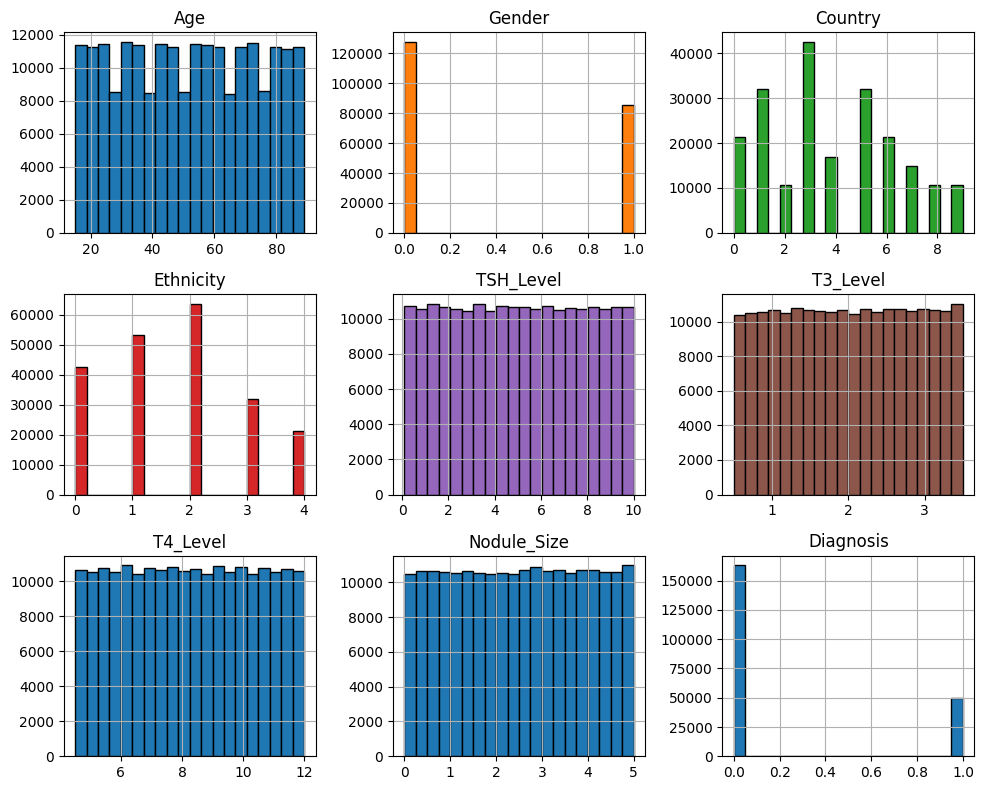

In [17]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
axes = data.hist(bins=20, edgecolor='black', figsize=(10, 8))
for ax, color in zip(axes.flatten(), colors):
    for patch in ax.patches:
        patch.set_facecolor(color)
plt.tight_layout()
plt.show()

In [18]:
null_counts = data.isnull().sum()
null_columns = null_counts[null_counts > 0].index.tolist()

In [19]:
object_columns = [col for col in null_columns if df[col].dtype == 'object']

In [20]:
int_columns = [col for col in null_columns if data[col].dtype in ['int64','float64']]

In [21]:
print (f"Object Columns with Null Values:  {object_columns}")
print (f"Non Object Columns with Null Values:  {int_columns}")

Object Columns with Null Values:  []
Non Object Columns with Null Values:  []


In [22]:
for col in object_columns:
    df[col] =df[col].fillna("No Data")
    print(f"NULL VALUE IS UPDATED FOR {col}")

Label_Encoder = LabelEncoder() 
Ordinal_Encoder = OrdinalEncoder()
Nominal_Columns =['Gender', 'Country','Ethnicity','Family_History','Radiation_Exposure','Iodine_Deficiency','Smoking','Obesity','Diabetes','Diagnosis']
Ordinal_Columns =['Thyroid_Cancer_Risk']

In [23]:
Label_Encoder = LabelEncoder()
Ordinal_Encoder = OrdinalEncoder()
print("\nNOW DATA WILL BE ENCODED\n")
for col in Nominal_Columns:
    data[col] = Label_Encoder.fit_transform(data[col])
    print(f"ENCODED >>> {col}")
for col in Ordinal_Columns:
    data[col] = Ordinal_Encoder.fit_transform(data[[col]])
    print(f"ENCODED >>> {col}")
data.to_csv('thyroid_cancer_risk_data_cleaned.csv', index=False)
print("------------------ NEW FILE CREATED WITH CLEAN DATA--------------------------------")


NOW DATA WILL BE ENCODED

ENCODED >>> Gender
ENCODED >>> Country
ENCODED >>> Ethnicity
ENCODED >>> Family_History
ENCODED >>> Radiation_Exposure
ENCODED >>> Iodine_Deficiency
ENCODED >>> Smoking
ENCODED >>> Obesity
ENCODED >>> Diabetes
ENCODED >>> Diagnosis
ENCODED >>> Thyroid_Cancer_Risk
------------------ NEW FILE CREATED WITH CLEAN DATA--------------------------------


# <p style="background-color: #e0f7fa; font-size: 120%; text-align: center; border-radius: 15px; color: #1a1a1a; font-weight: bold; font-family: 'Helvetica', 'Arial', sans-serif; border: 5px solid #00796B; padding: 15px; margin: 15px;">Feature Engineering</p>

In [24]:
X = data.iloc[:,:-1]
y= data['Diagnosis']

In [25]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Adaboost

In [27]:
model=AdaBoostClassifier() 
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [28]:
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.8250546557276852

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539



## KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming X and y are defined (features and target variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Accuracy: 0.7972683890077341

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87     32615
           1       0.60      0.38      0.47      9924

    accuracy                           0.80     42539
   macro avg       0.72      0.65      0.67     42539
weighted avg       0.78      0.80      0.78     42539



## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming X and y are defined (features and target variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Accuracy: 0.8216225111074543

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89     32615
           1       0.69      0.42      0.52      9924

    accuracy                           0.82     42539
   macro avg       0.77      0.68      0.71     42539
weighted avg       0.81      0.82      0.80     42539



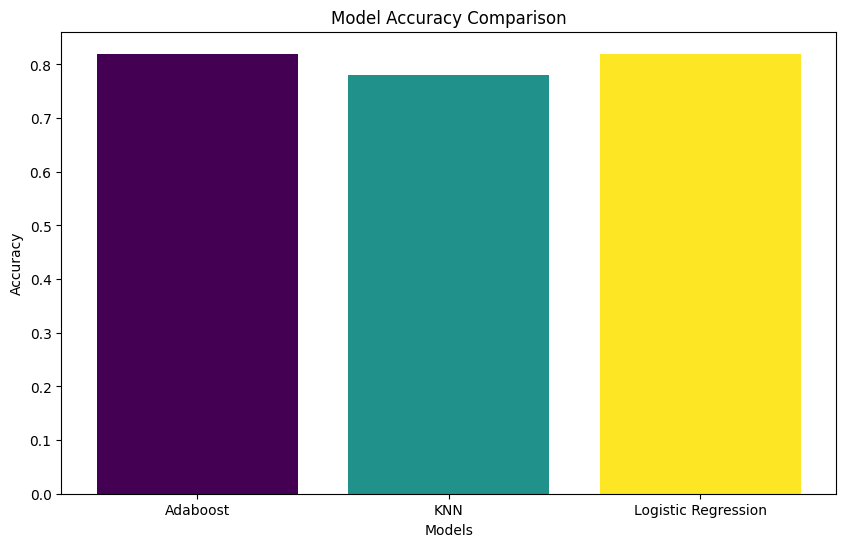

In [31]:
rf_accuracy = 0.82  
knn_accuracy = 0.78  
lr_accuracy = 0.82 

models = ['Adaboost', 'KNN', 'Logistic Regression']
accuracies = [rf_accuracy, knn_accuracy, lr_accuracy]
colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

# Plotting the bar chart to compare the accuracies
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()


## Key Metrics:
## Precision: This indicates how many of the predicted positive cases were actually positive.

Class 0: 0.85 (85% of the predicted class 0 cases were correct)
Class 1: 0.69 (69% of the predicted class 1 cases were correct)
Recall: This measures how many of the actual positive cases were correctly predicted by the model.

Class 0: 0.94 (94% of actual class 0 cases were correctly identified)
Class 1: 0.45 (45% of actual class 1 cases were correctly identified)
F1-Score: The harmonic mean of precision and recall, balancing the two metrics.

Class 0: 0.89 (good balance between precision and recall)
Class 1: 0.54 (indicating that recall is much lower than precision for class 1)
Accuracy: The overall proportion of correct predictions.

0.83 (83% of predictions are correct, which is quite good)
Macro Average: Averages the precision, recall, and F1-score for each class without considering their support.

Precision: 0.77
Recall: 0.69
F1-Score: 0.72
Weighted Average: Averages the precision, recall, and F1-score for each class, weighted by their support (the number of instances in each class).

Precision: 0.81
Recall: 0.83
F1-Score: 0.81
Conclusion:
Class 0 is being predicted with high accuracy (both in precision and recall), which suggests the model is particularly strong at identifying class 0 cases.
Class 1, however, has a much lower recall (0.45), meaning the model struggles to identify positive instances of class 1. The precision is also lower compared to class 0, indicating that many of the predicted class 1 cases may be false positives.
The accuracy is decent (0.83), but it’s important to consider that the dataset might be imbalanced, as indicated by the large difference between the support of class 0 (32615) and class 1 (9924).
Imbalanced Data: The model is more effective at predicting the majority class (class 0) but has difficulty with the minority class (class 1).
Actionable Insights:
Class 1 Improvements: Consider applying techniques such as resampling (over-sampling the minority class or under-sampling the majority class) or using a different evaluation metric (e.g., ROC-AUC) to address the imbalance.
Model Tuning: Adjusting the model's hyperparameters or using different algorithms (e.g., XGBoost, Random Forest, etc.) might help improve the performance, especially for class 1.

## Thank you